# Table Of Content <a id='back'>

* [Introduction](#introduction)
* [Project Description](#deskripsi)
* [Questions](#ask)
* [Preparing Data](#prepare)
    * [Importing Dataset](#import)
    * [Checking Dataset Completeness](#data_info)
    * [Fixing Dataset](#data_correcting)
    * [Adding Information](#add_information)
    * [Conclusion](#summary1)
* [Processing Data](#data_proceed)
    * [Viewing Games Per Period](#periode)
    * [Most Popular Platform This Year!](#2017)
    * [Correlation Between Data](#data_corr)
    * [Conclusion](#conclusion2)
* [Data Analysis](#data_analyze)
    * [Viewing Market Share Variations](#market_cap)
    * [Conclusion](#conclusion3)
* [Testing Hypotheses](#hypothesis)
    * [Conclusion](#conclusion4)
* [General Conclusion](#final_summary)

# Introduction <a id='introduction'>

This is a sales report for the game sales case study in Sprint 5: `Integrated Project 1` at TripleTen.
This project will follow the following steps to ensure its completion:

* it will follow the general data analysis steps: Asking questions, Preparing, Processing, Analyzing, Hypothesis Testing, and Data Visualization.
* each step has its own roadmap:
    * coding (if necessary)
    * findings (if necessary)
    * questions (if necessary)
    * key tasks
    * checklisted tasks
    * conclusion (at the end)

## Project Description <a id='description'></a>

**Scenario:**
You work at an online store called "Ice" that sells video games from around the world. Data related to user and expert reviews, genres, platforms (e.g., Xbox or PlayStation), and historical game sales data are available from open sources. You need to identify patterns that determine whether a game can be considered successful or not. By doing so, you can find the most potential games and plan their advertising campaigns.

In front of you is data from 2016. Imagine that it is now December 2016, and you are planning a campaign for 2017.r tahun 2016 dan kamu sedang merencanakan kampanye untuk tahun 2017.

## Questions <a id='ask'></a>

Based on the scenario above, we will search for and identify patterns of potential games to plan advertising campaigns.

The questions related to this case are:
1. Are the released games different significantly every period?
2. How is the sales of games on each platform?
3. Which platform has the highest game sales?
4. Does the game genre affect sales?

**Key Tasks:**
- [ ] Retrieve the dataset related to game sales.
- [ ] Find general information from the dataset.

## Preparing the Data <a id='prepare'>

The data used is historical game sales data available from open source. This dataset is stored on the TripleTen platform.

**File path:** `'/datasets/games.csv'`

### Import The Dataset <a id= 'import'></a>

In [1]:
# import library
import pandas as pd

In [2]:
# Creating DataFrame
path = '/datasets/games.csv'
data_games = pd.read_csv(path)

In [3]:
# Viewing general information from the dataset
print(data_games.info())
data_games.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
# Displaying sample data
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Findings:**
The dataset contains around 16,000 rows and 11 columns. The descriptions of each column are as follows:
- Name
- Platform
- Year_of_Release
- Genre
- NA_sales (sales in North America in million USD)
- EU_sales (sales in Europe in million USD)
- JP_sales (sales in Japan in million USD)
- Other_sales (sales in other countries in million USD)
- Critic_Score (critic score out of 100)
- User_Score (user score out of 10)
- Rating (ESRB rating)

**Questions:**
- Are there any NaN values? (found in the score and rating columns, further investigation needed)
- Does the dataset contain all necessary information? (need to calculate total sales for each game and check completeness of yearly data)
- Are there any data type errors? (3 columns need to be changed to a different data type)
- Are the column names correctly formatted? (column names should be converted to lowercase)

**Key Tasks:**
- [ ] Check for NaN values
- [ ] Assess completeness
- [ ] Convert data types
- [ ] Change column titles to lowercase
- [ ] Calculate total sales for each game
- [ ] Add total scores for each game

**Checklisted Task:**
- [x] Retrieve the dataset related to game sales.
- [x] Explore general information about the dataset.

### Exploring Dataset Completeness <a id= 'data_info'>

In [5]:
# view all NaN values
data_games.isnull().sum().sort_values(ascending= False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [6]:
# viewing sample null data
null_data = data_games[data_games.isnull().any(axis=1)]
null_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


After further investigation, several things were found:
- there are a total of 6 columns with null values.
- sales for some games are 0.

In addition to the above, we need to add total sales and total scores to the dataset.

**Questions:**
- what causes some game sales to have a value of 0? (it is possible that the game was not released in that country)
- are the NaN values influenced by certain patterns? (currently still unknown)

**Key Tasks:**
- [ ] change data types
- [ ] change column titles to all lowercase
- [ ] calculate total sales for each game
- [ ] add total scores
- [ ] investigate the reasons and number of games with 0 sales
- [ ] determine the factors causing and the number of NaN values

**Checklisted Tasks:**
- [x] view all NaN values
- [x] determine dataset completeness

In [7]:
# Investigating the Causes of 0 Sales for Games
zero_sales = data_games[
    (data_games['NA_sales'] <= 0) |
    (data_games['EU_sales'] <= 0) |
    (data_games['JP_sales'] <= 0) |
    (data_games['Other_sales'] <= 0)
]
zero_sales.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
61,Just Dance 3,Wii,2011.0,Misc,5.95,3.11,0.00,1.06,74.0,7.8,E10+
85,The Sims 3,PC,2009.0,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T
89,Pac-Man,2600,1982.0,Puzzle,7.28,0.45,0.00,0.08,NaN,NaN,NaN
100,Call of Duty: World at War,X360,2008.0,Shooter,4.81,1.88,0.00,0.69,84.0,7.6,M
103,Just Dance,Wii,2009.0,Misc,3.48,2.99,0.00,0.73,49.0,8,E10+
116,Just Dance 4,Wii,2012.0,Misc,4.05,2.16,0.00,0.55,74.0,7.3,E10+
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
138,World of Warcraft,PC,2004.0,Role-Playing,0.08,6.21,0.00,0.00,93.0,7.3,T
148,Final Fantasy XII,PS2,2006.0,Role-Playing,1.88,0.00,2.33,1.74,92.0,7.6,T
155,LEGO Star Wars: The Complete Saga,Wii,2007.0,Action,3.57,1.55,0.00,0.51,80.0,8.9,E10+


In [8]:
# Looking at the number of 0 sales for each period
zero_sales_counts = zero_sales[zero_sales['NA_sales'] <= 0]['Year_of_Release'].value_counts() + \
                      zero_sales[zero_sales['EU_sales'] <= 0]['Year_of_Release'].value_counts() + \
                      zero_sales[zero_sales['JP_sales'] <= 0]['Year_of_Release'].value_counts() + \
                      zero_sales[zero_sales['Other_sales'] <= 0]['Year_of_Release'].value_counts()
zero_sales_counts.sort_values(ascending= False).reset_index().head(15)

,index,Year_of_Release
0,2008.0,2478.0
1,2009.0,2461.0
2,2010.0,2158.0
3,2007.0,2137.0
4,2011.0,1860.0
5,2006.0,1858.0
6,2005.0,1425.0
7,2002.0,1242.0
8,2003.0,1125.0
9,2012.0,1102.0


In [9]:
# Finding out the number of null values
null_counts = null_data[['Year_of_Release', 'Platform']].value_counts()
null_counts = null_counts.reset_index()
null_counts.columns = ['year', 'platform', 'null_counts']
null_counts.head(15)

,year,platform,null_counts
0,2008.0,DS,311
1,2009.0,DS,296
2,2010.0,DS,267
3,1998.0,PS,226
4,2007.0,DS,215
5,2009.0,Wii,179
6,2010.0,Wii,176
7,1997.0,PS,175
8,1999.0,PS,169
9,1996.0,PS,159


In [10]:
# Finding out the factors causing NaN values
# Condition: Are null values due to the platform?
null_data[null_data['Platform']== 'DS']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,4.34,2.71,3.96,0.76,NaN,NaN,NaN
59,Super Mario 64,DS,2004.0,Platform,5.01,3.07,1.25,0.97,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16649,Real Crimes: The Unicorn Killer,DS,2011.0,Puzzle,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16656,Imagine Figure Skater (JP sales),DS,2007.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16675,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007.0,Action,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [11]:
# Finding the percentage of null values based on the platform
null_count_by_platform = null_data['Platform'].value_counts().reset_index()
count_by_platform = data_games['Platform'].value_counts().reset_index()
null_count_by_platform['total_counts'] = count_by_platform['Platform']

null_count_by_platform['percentage'] = (null_count_by_platform['Platform'] / count_by_platform['Platform']).mul(100).round(2).astype(str)+"%"
null_count_by_platform.columns = ['platforms', 'null_counts', 'total_counts', 'null_percentage']
null_count_by_platform.head(10)

,platforms,null_counts,total_counts,null_percentage
0,DS,1448,2161,67.01%
1,PS,1012,2151,47.05%
2,PS2,886,1331,66.57%
3,Wii,755,1320,57.2%
4,PSP,754,1262,59.75%
5,PS3,533,1209,44.09%
6,GBA,396,1197,33.08%
7,X360,375,974,38.5%
8,3DS,355,824,43.08%
9,N64,319,822,38.81%


In [12]:
# Condition: Do games released on other platforms have relatively similar scores?
duplicated = data_games[data_games['Name'].duplicated()]
data_games[data_games['Name'].isin(duplicated['Name'])].sort_values(by= 'Name').head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
14658,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
1285,007: Quantum of Solace,X360,2008.0,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
1785,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
4475,007: Quantum of Solace,PS2,2008.0,Action,0.17,0.00,0.00,0.26,NaN,NaN,NaN
2243,007: The World is not Enough,PS,2000.0,Action,0.51,0.35,0.00,0.06,61.0,6.7,T
1204,007: The World is not Enough,N64,2000.0,Action,1.13,0.38,0.02,0.03,NaN,NaN,NaN


In [1]:
# Checking the 'tbd' values in the 'User_Score' column
print('Sum of tbd values:',len(data_games[data_games['User_Score'] == 'tbd']),'baris')

NameError: name 'data_games' is not defined

### Findings:
After investigating several sources, it was found that game sales in a country can be 0 because the game was not released in that country. So, for this case, the value 0 in the dataset does not need to be replaced. Then, for null values, if categorized by platform, almost all platforms have at least half of the values as null.

There is one more thing to note: the 'User_Score' column has values of 'tbd,' which stands for 'to be determined.' If we change the data type to integer, it will cause an error.

**Questions:**
- How can we fill null values?
    - (Answer: For score columns, we will replace them with the average of each game.)
    - (Answer: For rating and release year columns, we will replace them with the release year of each game on other platforms.)
- How can we fill 'tbd' values? (We will simply change them to 0 because the score is not yet determined.)

**Key Tasks:**
- [ ] Change column titles to lowercase.
- [ ] Change 'tbd' values.
- [ ] Change data types.
- [ ] Fill NaN values.
- [ ] Calculate total sales for each game.
- [ ] Add total scores.

**Checklisted Tasks:**
- [x] Investigate the causes and number of game sales with 0.
- [x] Determine the factors causing and number of NaN values.

### Data Correction <a id='data_correcting'></a>


In [14]:
# Changing column titles to lowercase
data_games.columns = data_games.columns.str.lower()
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
# Replacing 'tbd' values
data_games['user_score'] = data_games['user_score'].replace({'tbd' : 0})

# Change data type 'user_score'
data_games['user_score'] = data_games['user_score'].astype(float)

In [16]:
# Filling NaN values
# For the score columns: creating a pivot table containing the average score for each game
mean_scores = pd.pivot_table(data_games, index='name', values=['critic_score','user_score'], aggfunc='mean').reset_index()
mean_scores

,name,critic_score,user_score
0,Tales of Xillia 2,71.0,7.90
1,.hack//Infection Part 1,75.0,8.50
2,.hack//Mutation Part 2,76.0,8.90
3,.hack//Outbreak Part 3,70.0,8.70
4,007 Racing,51.0,4.60
...,...,...,...
6133,thinkSMART,NaN,0.00
6134,thinkSMART FAMILY!,NaN,0.00
6135,thinkSMART: Chess for Kids,NaN,0.00
6136,uDraw Studio,71.0,0.00


In [17]:
# Filling some NaN values in 'critic_score' and 'user_score'
def replace_null(dataset, values, column):
    mean_scores = values.groupby('name')[column].mean()
    dataset[column].fillna(dataset['name'].map(mean_scores), inplace=True)
    return dataset


data_games = replace_null(dataset= data_games, values= mean_scores, column= 'critic_score')
data_games = replace_null(dataset= data_games, values= mean_scores, column= 'user_score')

# Filling remaining NaN values in 'critic_score' and 'user_score'
data_games[['critic_score', 'user_score']] = data_games[['critic_score', 'user_score']].fillna(0)

In [18]:
# Filling some NaN values in 'year_of_release' column
def replace_null_categorical(dataset, values, column):
    mapping_dict = values.groupby('name')[column].first().to_dict()
    dataset[column].fillna(dataset['name'].map(mapping_dict), inplace=True)
    return dataset

fill_year = data_games[['name', 'year_of_release']].groupby('name').head()
data_games = replace_null_categorical(dataset= data_games, values= fill_year, column= 'year_of_release')

# Removing data with missing release years
data_games.dropna(subset=['year_of_release'], inplace=True)
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NaN


In [19]:
# Filling some NaN values in the 'rating' column
rating_df = data_games[['name', 'rating']].groupby('name').head().dropna()
replace_null_categorical(dataset= data_games, values= rating_df, column= 'rating')

# Filling NaN values in the 'rating' column
data_games['rating'] = data_games['rating'].fillna('NA')

In [20]:
# Changing the data types of 'year_of_release' and 'critic_score'
data_games['year_of_release'] = data_games['year_of_release'].astype(int)
data_games['critic_score'] = data_games['critic_score'].astype(int)

In [21]:
# Rechecking the fixed dataset
print(data_games.shape)
print()
print(data_games.info())
print()
print(data_games.describe())
print()
print(data_games.isnull().sum())

(16562, 11)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16562 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16560 non-null  object 
 1   platform         16562 non-null  object 
 2   year_of_release  16562 non-null  int64  
 3   genre            16560 non-null  object 
 4   na_sales         16562 non-null  float64
 5   eu_sales         16562 non-null  float64
 6   jp_sales         16562 non-null  float64
 7   other_sales      16562 non-null  float64
 8   critic_score     16562 non-null  int64  
 9   user_score       16562 non-null  float64
 10  rating           16562 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB
None

       year_of_release      na_sales      eu_sales      jp_sales  \
count     16562.000000  16562.000000  16562.000000  16562.000000   
mean       2006.484724      0.264027      0.145776      0.078046   
std     

In [22]:
# Dropping missing values
data_games = data_games.dropna()
data_games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Explanation:**

- **Function:**
The `'replace_null'` function is designed to fill null values in a dataset based on the values provided from another dataset. This function takes three arguments: `dataset` (the data to be filled), `values` (the data containing replacement values), and `column` (the name of the column to be filled). The function iterates through the values in `values`, matches the game names, and replaces null values in the specified column with the corresponding values from `values`.

- **Filling NaN Values with 0:**
Due to lack of information, we fill NaN values with 0. If we fill them with the mean or median, it would alter the original values of the dataset.

- **Data Types:**
We change the data types of 3 columns: `'user_score', 'year_of_release', 'critic_score'`. Initially, `'user_score'` was an object type because there were string values of _'tbd'_ in that column. After replacing the _'tbd'_ values, we convert it to float to avoid losing decimal places in other values. Then, we change the data type of the `'year_of_release'` and `'critic_score'` columns to integer to remove the trailing zeros after the decimal point because they are not needed.

- **Dropna:**
The code `data_games.dropna(subset=['year_of_release'], inplace=True)` removes rows with empty values in the `'year_of_release'` column from the `data_games` DataFrame. This helps maintain data integrity by ensuring that only data with valid release year information remains in the DataFrame.

**Questions:**
- If a function has been created, why fill NaN values again? (The function only addresses and fills NaN values in games that have duplicates. Games that do not have duplicates will still have NaN values.)
- Why not fill all NaN values in numerical columns with 0? (Too many missing values, almost half of the dataset size is null, so we try to fill null values with reasonable values as much as possible.)
- Is there a way to fill all NaN values accurately? (Yes, by creating a model or using machine learning. But due to limited capabilities, we use a simpler method.)

**Key Tasks:**
- [ ] Calculate total sales for each game
- [ ] Add total scores

**Checklisted Tasks:**
- [x] Change column titles to lowercase
- [x] Change 'tbd' values
- [x] Change data types
- [x] Fill NaN values

### Adding Information <a id='add_information'></a>


In [23]:
# Copying the DataFrame to avoid warning messages and errors
data_games = data_games.copy()

In [24]:
# Adding total game sales
data_games['total_sales'] = data_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data_games.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NA,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NA,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,NA,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,NA,28.31


In [25]:
# Adding total scores
data_games['total_score'] = data_games[['critic_score', 'user_score']].sum(axis=1)
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_score
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54,84.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NA,40.24,0.0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52,90.3
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77,88.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NA,31.38,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,NA,0.01,0.0
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,NA,0.01,0.0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,NA,0.01,0.0
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,NA,0.01,0.0


**Question:**
- Is the data complete? (With the addition of the total score and total sales columns, it seems that this dataset is now complete.)

**Checklisted Task:**
- [x] Calculate total sales for each game
- [x] Add total scores

### Summary <a id='summary1'></a>


We have imported, reviewed, corrected, and added information to the dataset. Next, we will process the dataset. Please note that we will be creating a model for the year 2017.

## Data Processing <a id='data_proceed'></a>


In this stage, we will process and examine several factors that influence sales.

**Related Questions:**
- How many games are released each year?
- How many games are released for each platform per period?
- Which platform has the highest game sales?
- Which platform is the most popular?
- How is global sales on each platform?
- Do reviews affect sales on popular platforms?
- Is there a correlation between reviews and sales?
- Are sales of the same game on other platforms equivalent?
- Which genre is the most popular?

**Key Tasks:**
- [ ] View the number of games per period.
- [ ] Calculate the number of games for each platform per period.
- [ ] Choose the year to use for the 2017 model.
- [ ] Create a chart comparing which platform has the highest sales.
- [ ] Choose the most popular platform for the selected year.
- [ ] Create a boxplot to see the average sales of each platform.
- [ ] Create a chart to see global sales per platform.
- [ ] Create a correlation between reviews and sales per platform.
- [ ] Create a general distribution for genre.

### Viewing Games per Period <a id='periode'></a>


In [26]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Viewing the Number of Games Per Period
game_per_year = data_games.groupby('year_of_release')['name'].count().reset_index()
game_per_year.sort_values(by= 'name', ascending= False).head(10)

,year_of_release,name
28,2008,1441
29,2009,1430
30,2010,1269
27,2007,1202
31,2011,1153
26,2006,1019
25,2005,947
22,2002,845
23,2003,783
24,2004,764


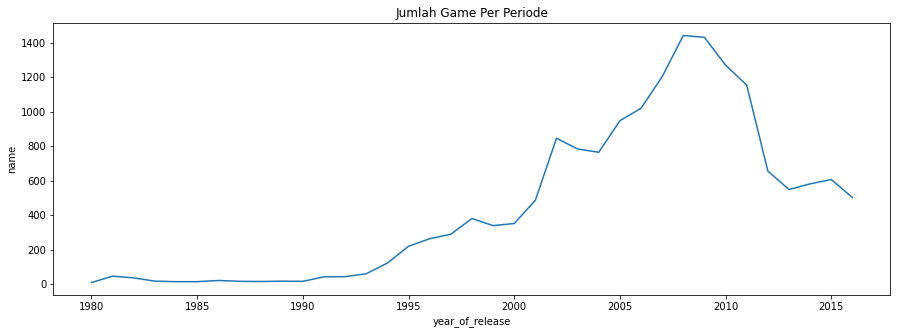

In [28]:
# Creating a chart for the number of games per period
plt.figure(figsize=(15, 5))
sns.lineplot(data= game_per_year, x= 'year_of_release', y= 'name')
plt.title('Jumlah Game Per Periode')
plt.show()

In [29]:
# Viewing the game sales on the most popular platform over time
popular_platform = data_games.groupby('platform').agg({'total_sales': 'sum'}) \
.sort_values(by= 'total_sales', ascending= False).reset_index().head()

popular_platform = data_games.loc[data_games['platform'].isin(popular_platform['platform'])]
popular_platform = popular_platform.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by= 'total_sales', ascending= False)
popular_platform.head()

,platform,year_of_release,total_sales
16,PS2,2004,211.81
14,PS2,2002,208.36
40,Wii,2009,206.97
15,PS2,2003,193.05
39,Wii,2008,177.68


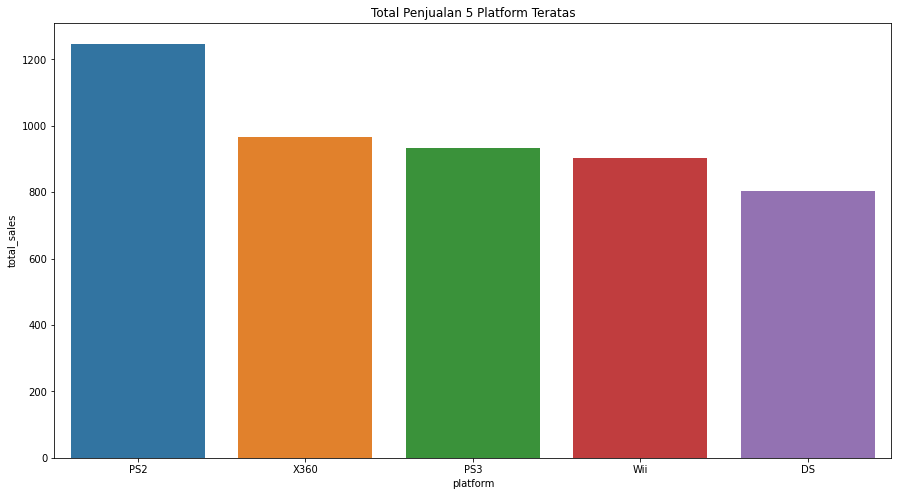

In [30]:
# melihat perbandingan total penjualan 5 platform teratas
top_5_platform = data_games.loc[data_games['platform'].isin(popular_platform['platform'])]
top_5_platform = top_5_platform.groupby('platform')['total_sales'].sum().reset_index().sort_values(by= 'total_sales', ascending= False)

plt.figure(figsize= (15, 8))
sns.barplot(data= top_5_platform, x= 'platform', y= 'total_sales', ci=None)
plt.title('Total Penjualan 5 Platform Teratas')
plt.show()

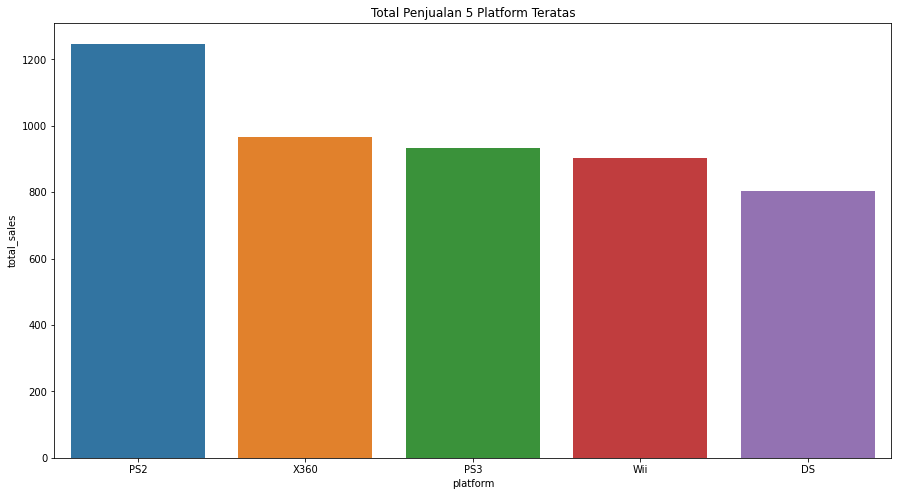

In [30]:
# Comparing the total sales of the top 5 platforms
top_5_platform = data_games.loc[data_games['platform'].isin(popular_platform['platform'])]
top_5_platform = top_5_platform.groupby('platform')['total_sales'].sum().reset_index().sort_values(by= 'total_sales', ascending= False)

plt.figure(figsize= (15, 8))
sns.barplot(data= top_5_platform, x= 'platform', y= 'total_sales', ci=None)
plt.title('Total Penjualan 5 Platform Teratas')
plt.show()

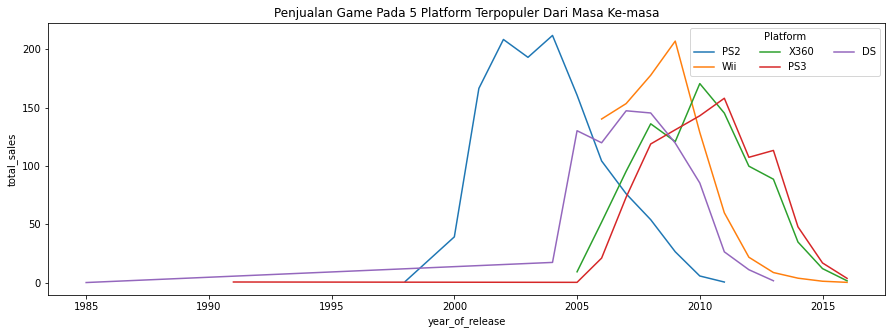

In [31]:
plt.figure(figsize=(15, 5))
sns.lineplot(data= popular_platform, x= 'year_of_release', y= 'total_sales', hue='platform', linewidth=1.5)
plt.legend(title='Platform', ncol= 3)
plt.title('Penjualan Game Pada 5 Platform Terpopuler Dari Masa Ke-masa')
plt.show() 

**Insights from the Charts Above:**
- The first chart shows game sales over time. Game sales increased from 2005 to 2010. This coincided with the release of the highly popular PS2 and Nintendo Wii.
- New platforms appear at least 5-7 years after the release of the old platform.
- A platform typically lasts 5-10 years from its heyday.

**Questions:**
- Which platform is the most popular (Top 5 platforms: PS2, Xbox 360, PS3, Nintendo Wii, Nintendo DS)?
- How many games are released each year? (The number of games released each year began to rise from 2000 and peaked in 2010 with over 1400 games released most.)
- How many games are released per platform per period? (Most release around 100-200 games)
- Which platform has the highest game sales? (PS2 is the platform with the highest sales throughout the period)

**Key Tasks:**
- [ ] Choose the year to use for the 2017 model.
- [ ] Create a chart comparing which platform has the highest sales.
- [ ] Select the most popular platform in the chosen year.
- [ ] Create a chart to view global sales per platform.
- [ ] Create a general distribution for genres.
- [ ] Create a correlation between reviews and sales per platform.

**Checklisted Tasks:**
- [x] View the number of games per period.
- [x] Calculate the number of games per platform per period.

### Most Popular Platforms This Year! <a id='2017'></a>


**Question:**
* From which year's data will be used to create the model in 2017? (We will use data that is still relevant to 2017, which is data from the period 5 years before 2017.)

In [32]:
# Fetching data for the previous 5 years
periode_df = data_games[data_games['year_of_release'] >= 2012]
periode_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,total_score
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,105.2
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,105.1
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,NA,14.63,0.0
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0.0,NA,14.60,0.0
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79,88.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,NA,0.01,0.0
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,0.0,NA,0.01,0.0
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,NA,0.01,0.0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,NA,0.01,0.0


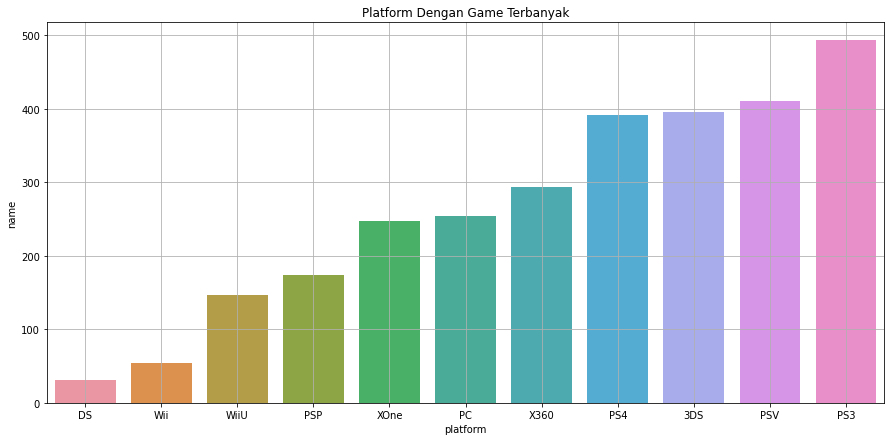

In [33]:
# Viewing the platform with the most game releases
game_count_per_periode = periode_df.groupby('platform')['name'].count().reset_index().sort_values(by= 'name', ascending= True)

# Creating a chart showing the number of game releases per platform
plt.figure(figsize= (15, 7))
sns.barplot(data= game_count_per_periode, x= 'platform', y= 'name')
plt.title('Platform Dengan Game Terbanyak')
plt.grid(True)
plt.show()

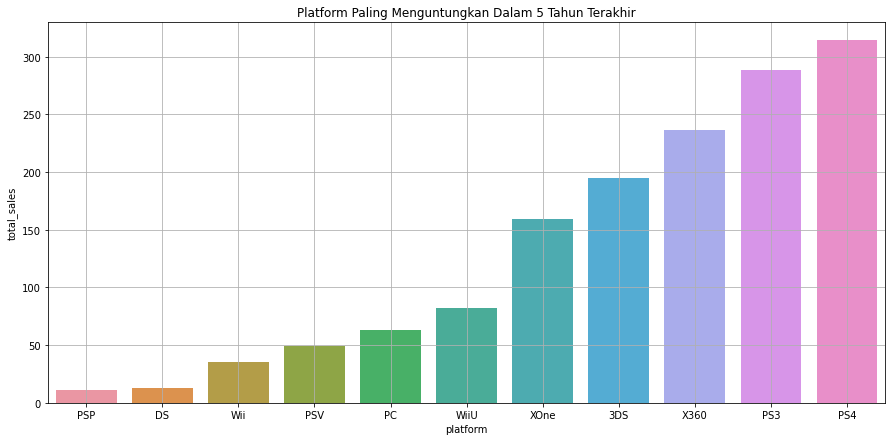

In [34]:
# Making a comparison of sales for each platform in this period
periode_sales = periode_df.groupby('platform')['total_sales'].sum().reset_index().sort_values(by= 'total_sales', ascending= True)

# Creating a chart showing platform sales in this period
plt.figure(figsize= (15, 7))
sns.barplot(data= periode_sales, x= 'platform', y= 'total_sales')
plt.title('Platform Paling Menguntungkan Dalam 5 Tahun Terakhir')
plt.grid(True)
plt.show()

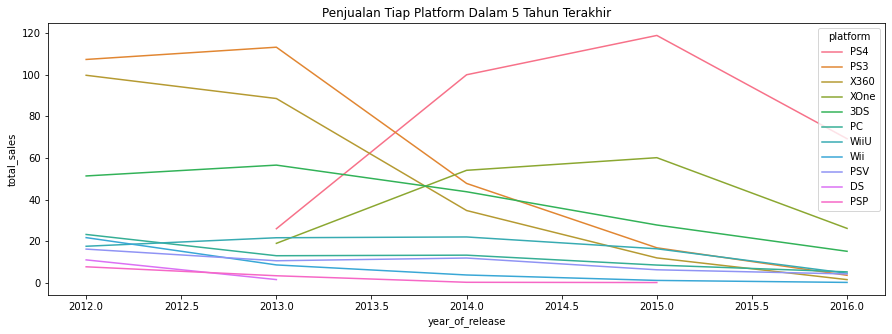

In [35]:
# Selecting the top 3 platforms
# Observing how sales for each platform change over time
sales_per_period = periode_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by= 'total_sales', ascending= False)

plt.figure(figsize= (15, 5))
sns.lineplot(data= sales_per_period, x= 'year_of_release', y= 'total_sales', hue= 'platform')
plt.title('Penjualan Tiap Platform Dalam 5 Tahun Terakhir')
plt.show()

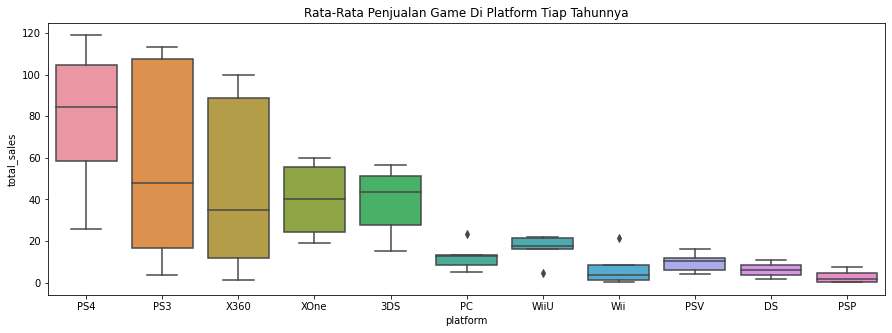

In [36]:
# Creating a boxplot to see the average sales for each platform
plt.figure(figsize= (15, 5))
sns.boxplot(data= sales_per_period, x= 'platform', y= 'total_sales')
plt.title('Rata-Rata Penjualan Game Di Platform Tiap Tahunnya')
plt.show()

**Insight From the Above Chart:**
Although the PS2 was very popular from 2000 to 2010, the next generation of this platform was able to generate significant profits, surpassing other platforms. For example, the PS3 in 2012 and 2013 was able to become the most profitable platform, while the PS4 in the following years became the leader in this category.

As for the average sales per year:
- PS4 was able to generate an average profit of around 80 million USD during the period.
- PS3 generated an average of 50 million USD during the period.
- Xbox 360 generated an average of 35 million USD during the period.
- Xbox One was able to generate an average of 40 million USD during the period.
- Nintendo 3DS generated an average of 40 million USD during the period.

**Question:**
- What genre is the most popular and generates the most profit?

**Key Tasks:**
- [ ] Create a correlation between reviews and sales per platform.
- [ ] Identify the most popular genre.
- [ ] Create a general distribution for genres.

**Checklisted Tasks:**
- [x] Select the year to be used to create the 2017 model.
- [x] Create a chart comparing the top-selling platforms.
- [x] Select the most popular platform for the chosen year.
- [x] Create a chart to see global sales per platform.

### Correlation Between Data <a id='data_corr'></a>


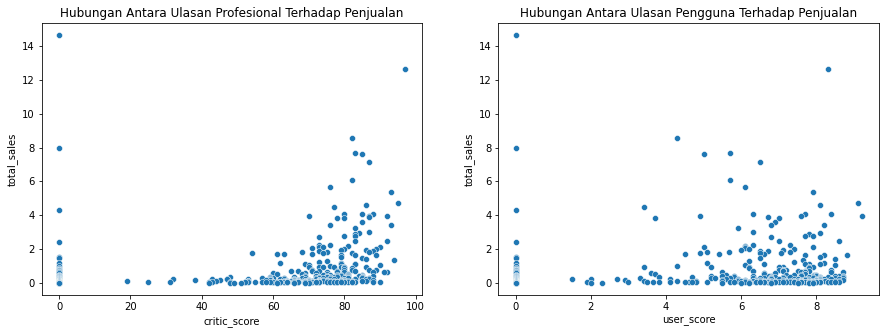

In [37]:
# melihat korelasi antara ulasan dengan penjualan pada platform PS4
corr_df = periode_df.loc[periode_df['platform'] == 'PS4']

plt.figure(figsize= (15, 5))
plt.subplot(1,2,1)
sns.scatterplot(data= corr_df, x= 'critic_score', y= 'total_sales')
plt.title('Hubungan Antara Ulasan Profesional Terhadap Penjualan')

plt.subplot(1,2,2)
sns.scatterplot(data= corr_df, x= 'user_score', y= 'total_sales')
plt.title('Hubungan Antara Ulasan Pengguna Terhadap Penjualan')
plt.show()

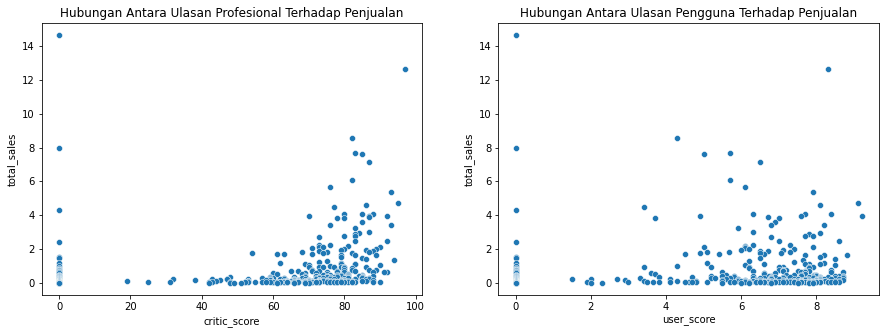

In [37]:
# melihat korelasi antara ulasan dengan penjualan pada platform PS4
corr_df = periode_df.loc[periode_df['platform'] == 'PS4']

plt.figure(figsize= (15, 5))
plt.subplot(1,2,1)
sns.scatterplot(data= corr_df, x= 'critic_score', y= 'total_sales')
plt.title('Hubungan Antara Ulasan Profesional Terhadap Penjualan')

plt.subplot(1,2,2)
sns.scatterplot(data= corr_df, x= 'user_score', y= 'total_sales')
plt.title('Hubungan Antara Ulasan Pengguna Terhadap Penjualan')
plt.show()

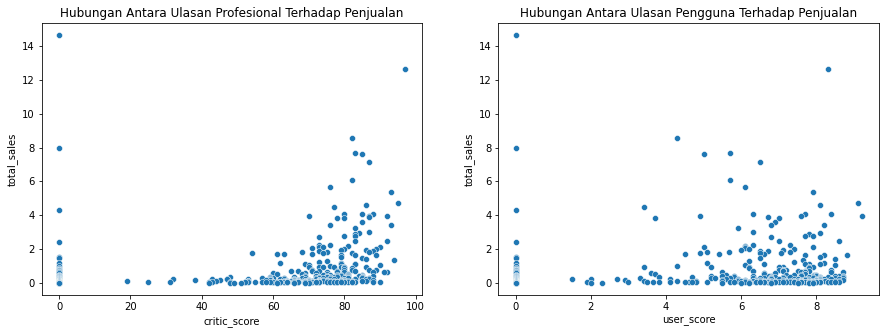

In [37]:
# melihat korelasi antara ulasan dengan penjualan pada platform PS4
corr_df = periode_df.loc[periode_df['platform'] == 'PS4']

plt.figure(figsize= (15, 5))
plt.subplot(1,2,1)
sns.scatterplot(data= corr_df, x= 'critic_score', y= 'total_sales')
plt.title('Hubungan Antara Ulasan Profesional Terhadap Penjualan')

plt.subplot(1,2,2)
sns.scatterplot(data= corr_df, x= 'user_score', y= 'total_sales')
plt.title('Hubungan Antara Ulasan Pengguna Terhadap Penjualan')
plt.show()

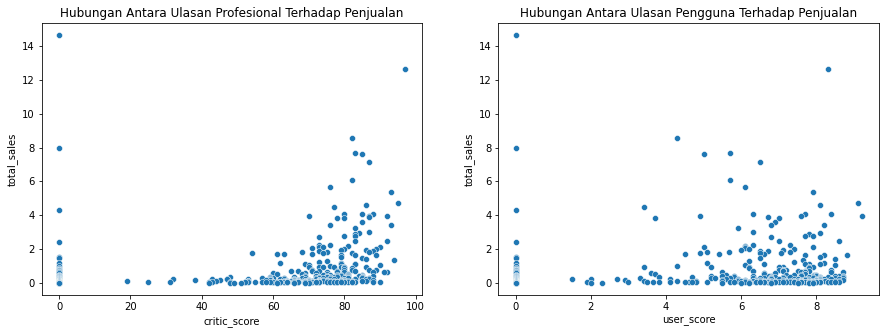

In [37]:
# Examining the correlation between reviews and sales on the PS4 platform
corr_df = periode_df.loc[periode_df['platform'] == 'PS4']

plt.figure(figsize= (15, 5))
plt.subplot(1,2,1)
sns.scatterplot(data= corr_df, x= 'critic_score', y= 'total_sales')
plt.title('Hubungan Antara Ulasan Profesional Terhadap Penjualan')

plt.subplot(1,2,2)
sns.scatterplot(data= corr_df, x= 'user_score', y= 'total_sales')
plt.title('Hubungan Antara Ulasan Pengguna Terhadap Penjualan')
plt.show()

**Insight from the Above Chart:**
- Reviews from professional critics can have a slight significant impact on game sales.
- While game sales are not significantly affected by user reviews, they still have a slight influence on sales.
- So, criticism from professionals can affect sales slightly.

**Question:**
- Do games with higher scores have the same sales as other platforms? What about games with low scores? Are they the same?

**Key Tasks:**
- [ ] Compare the sales of games with low scores to other platforms.
- [ ] Identify the most popular genre.
- [ ] Create a general distribution for genres.

**Checklisted Tasks:**
- [x] Create a correlation between reviews and sales per platform.

In [38]:
# Looking at game sales on other platforms
high_score_game = periode_df[periode_df['total_score'] >= 70]
low_score_game = periode_df[(periode_df['total_score'] <= 30) & (periode_df['total_score'] > 0) ]

high_score_game = pd.pivot_table(high_score_game, index= ['name', 'platform']).reset_index()
low_score_game = pd.pivot_table(low_score_game, index= ['name', 'platform']).reset_index()


high_score_game = high_score_game[high_score_game['name'].duplicated()]
low_score_game = low_score_game[low_score_game['name'].duplicated()]

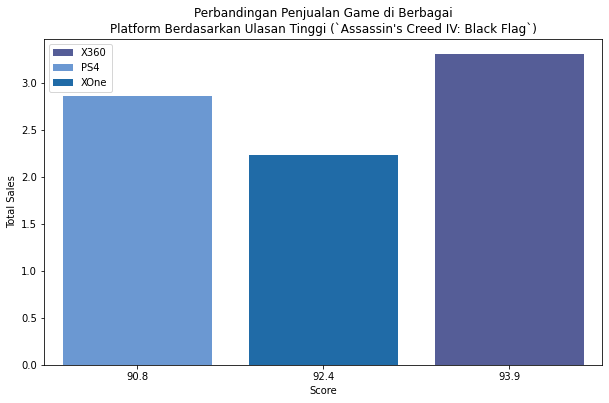

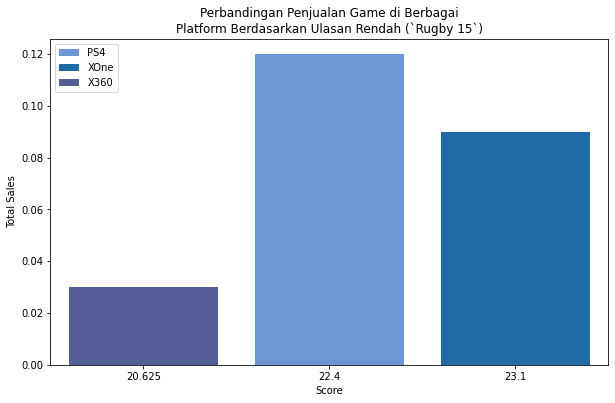

In [39]:
# Examining the sales of the same game with low and high ratings
def plot_game_sales(df, game_name, title, palette):
    game_df = df[df['name'] == game_name].sort_values(by='total_sales', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=game_df, x='total_score', y='total_sales', hue='platform', dodge=False, palette=palette)
    plt.xlabel('Score')
    plt.ylabel('Total Sales')
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

    
platform_palette = {'PS4': '#5A96E3', 'X360': '#4A55A2', 'XOne': '#0A6EBD'}

low_score_game = low_score_game.query('platform in @platform_palette')
high_score_game = high_score_game.query('platform in @platform_palette')

low_rank_game_name = "Rugby 15"
high_rank_game_name = "Assassin's Creed IV: Black Flag"

plot_game_sales(high_score_game, high_rank_game_name, f'Perbandingan Penjualan Game di Berbagai\nPlatform Berdasarkan Ulasan Tinggi (`{high_rank_game_name}`)',palette= platform_palette)
plot_game_sales(low_score_game, low_rank_game_name, f'Perbandingan Penjualan Game di Berbagai\nPlatform Berdasarkan Ulasan Rendah (`{low_rank_game_name}`)',palette= platform_palette )

In [40]:
# Observing the average sales of one game on various platforms
print(f'Rata-rata penjualan game rangking tinggi di setiap platform:', high_score_game[high_score_game['name']== "Assassin's Creed IV: Black Flag"]['total_sales'].mean())
print(f'Rata-rata penjualan game dengan ulasan rendah di setiap platform:', low_score_game[low_score_game['name']== "Rugby 15"]['total_sales'].mean())

Rata-rata penjualan game rangking tinggi di setiap platform: 2.8033333333333332
Rata-rata penjualan game dengan ulasan rendah di setiap platform: 0.08


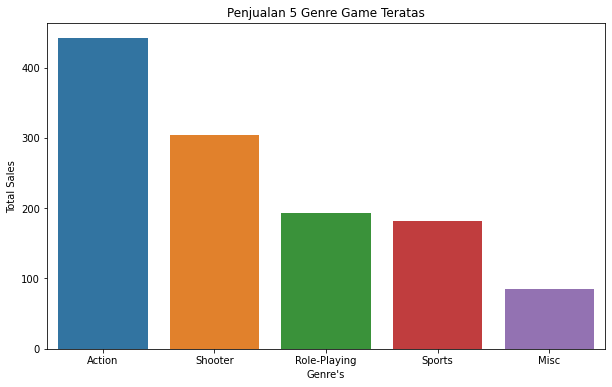

In [41]:
# Viewing sales by genre
# Selecting the top 5 genres
top_5_genre = periode_df.groupby('genre')['total_sales'].sum().nlargest(5).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_genre, x='genre', y='total_sales', dodge=False)
plt.xlabel("Genre's")
plt.ylabel('Total Sales')
plt.title('Penjualan 5 Genre Game Teratas')
plt.show()

**Insight from the Above Plot:**
- The same game on different platforms with high reviews generates more than 2 million USD in profit on each platform (we take the top 3 platforms here).
- Whereas games with low reviews get an average of 800 thousand USD in sales on each platform.
- The action genre is the most popular and profitable.

**Checklisted Tasks:**
- [x] Compare the sales of games with high and low scores on other platforms.
- [x] Identify the most popular genre.
- [x] Create a general distribution for genres.

### Conclusion

Over the past 3.5 decades, the gaming industry has undergone significant development. The growth started in 2000 and peaked in 2009, where the PS2 dominated game sales. However, in the following years, there was a decline possibly related to the shift to mobile games. Nevertheless, in 2013, the PS3 accumulated the most games, while the PS4 led sales until 2015 with an average of 80 million USD per year.

Another factor affecting sales is reviews from professionals and users. The action genre is the most popular and sought-after by players. Game sales have also been shown to be influenced by these trends, indicating a dynamic evolution in the gaming industry.e.

## Data Analysis <a id='data_analyze'></a>


Performing user profiling for each region
for each region (NA, EU, JP), determine:
- The top 5 platforms. Explain the variation in market share from one region to another.
- The top 5 genres. Explain the differences.
- Does the ESRB rating affect sales in each region?

**Key Task:**
- [ ] Create a plot for each region showing the variation in market share by platform.
- [ ] Compare genres in each region.
- [ ] Examine whether ESRB ratings affect sales in each region.

### Viewing Market Share Variations <a id='market_cap'></a>


In [42]:
# Filtering the dataset with the top 5 platforms
group_df = periode_df[['platform', 'genre', 'na_sales', 'eu_sales', 'jp_sales','rating', 'total_sales']]

listed_df = group_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
listed_df = listed_df.nlargest(5, columns=['na_sales', 'eu_sales', 'jp_sales'])

listed_df = listed_df.reset_index()
listed_df

,platform,na_sales,eu_sales,jp_sales
0,X360,140.06,74.52,1.57
1,PS4,108.74,141.09,15.96
2,PS3,103.38,106.86,35.29
3,XOne,93.12,51.59,0.34
4,3DS,55.31,42.64,87.79


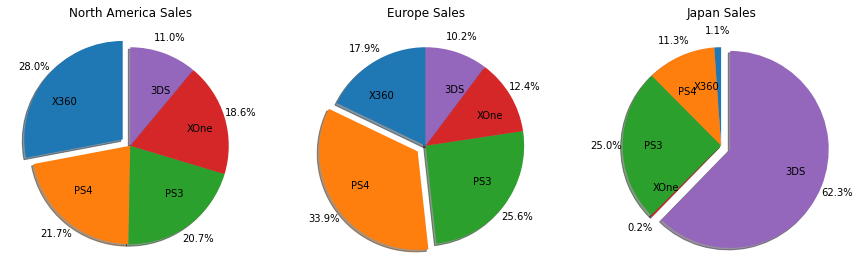

In [43]:
# Viewing Market Share in each country
na_explode = (0.1, 0, 0, 0, 0)
eu_explode = (0, 0.1, 0, 0, 0)
jp_explode = (0, 0, 0, 0, 0.1)

fig, ax = plt.subplots(1, 3)

ax[0].pie(listed_df['na_sales'], labels= listed_df['platform'], explode=na_explode, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=1.17,labeldistance=.6)
ax[0].set_title('North America Sales')

ax[1].pie(listed_df['eu_sales'], labels= listed_df['platform'], explode=eu_explode, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=1.17, labeldistance=.6)
ax[1].set_title('Europe Sales')

ax[2].pie(listed_df['jp_sales'], labels= listed_df['platform'], explode=jp_explode, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=1.17, labeldistance=.6)
ax[2].set_title('Japan Sales')

fig.set_size_inches(15, 5)
plt.show()

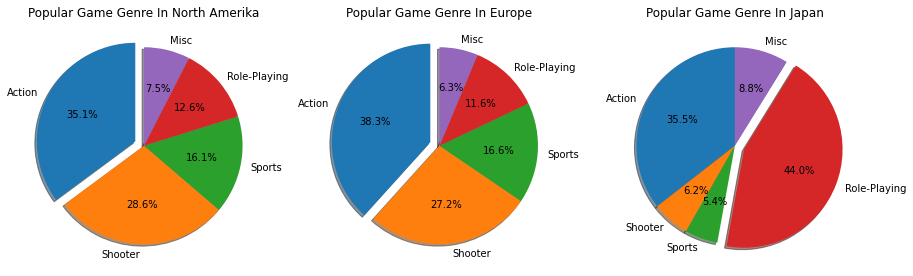

In [44]:
# Comparing popular genres in each region
genre_df = group_df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
genre_df = genre_df.nlargest(5, columns=['na_sales', 'eu_sales', 'jp_sales'])
genre_df = genre_df.reset_index()

na_explode = (0.1, 0, 0, 0, 0)
eu_explode = (0.1, 0, 0, 0, 0)
jp_explode = (0, 0, 0, 0.1, 0)

fig, ax = plt.subplots(1, 3)

ax[0].pie(genre_df['na_sales'], labels= genre_df['genre'], explode=na_explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].set_title('Popular Game Genre In North Amerika')

ax[1].pie(genre_df['eu_sales'], labels= genre_df['genre'], explode=eu_explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('Popular Game Genre In Europe')

ax[2].pie(genre_df['jp_sales'], labels= genre_df['genre'], explode=jp_explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[2].set_title('Popular Game Genre In Japan')

fig.set_size_inches(15, 5)
plt.show()

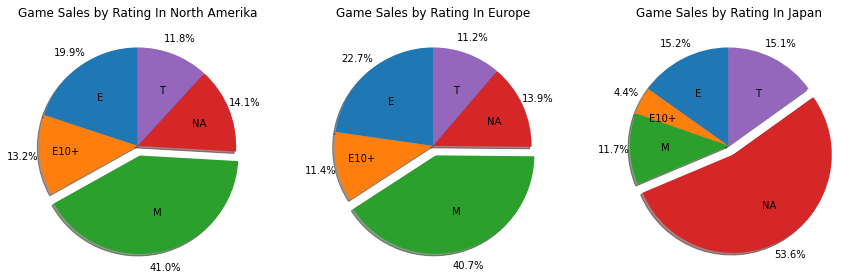

In [45]:
# Viewing sales by rating
rating_df = group_df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
rating_df = rating_df.reset_index()

na_explode = (0, 0, 0.1, 0, 0)
eu_explode = (0, 0, 0.1, 0, 0)
jp_explode = (0, 0, 0, 0.1, 0)

fig, ax = plt.subplots(1, 3)

ax[0].pie(rating_df['na_sales'], labels= rating_df['rating'], explode=na_explode, autopct='%1.1f%%',
        shadow=True, startangle=90,  pctdistance=1.17,labeldistance=.6)
ax[0].set_title('Game Sales by Rating In North Amerika')

ax[1].pie(rating_df['eu_sales'], labels= rating_df['rating'], explode=eu_explode, autopct='%1.1f%%',
        shadow=True, startangle=90,  pctdistance=1.17,labeldistance=.6)
ax[1].set_title('Game Sales by Rating In Europe')

ax[2].pie(rating_df['jp_sales'], labels= rating_df['rating'], explode=jp_explode, autopct='%1.1f%%',
        shadow=True, startangle=90,  pctdistance=1.17,labeldistance=.6)
ax[2].set_title('Game Sales by Rating In Japan')

fig.set_size_inches(15, 5)
plt.show()

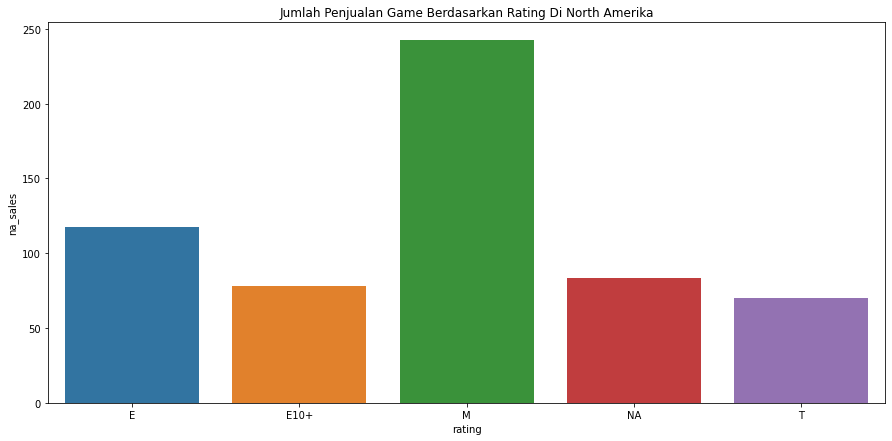

In [46]:
# Viewing the number of sales by rating in North America
plt.figure(figsize= (15,7))
sns.barplot(data= rating_df, x= 'rating', y= 'na_sales')
plt.title('Jumlah Penjualan Game Berdasarkan Rating Di North Amerika')
plt.show()

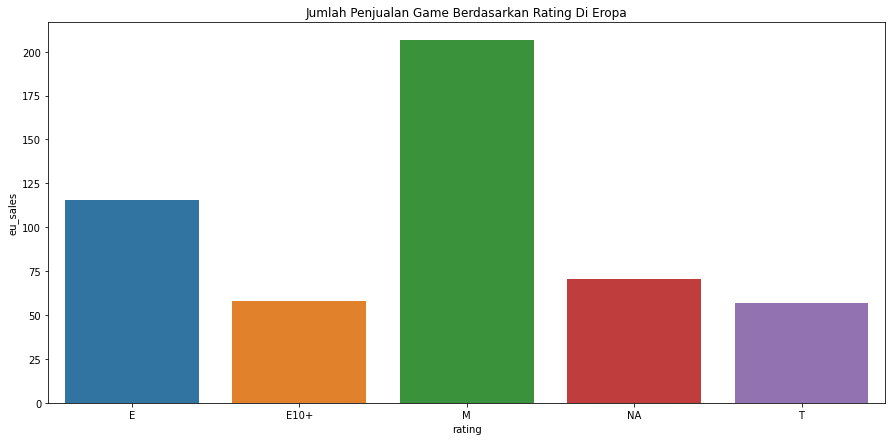

In [47]:
# Viewing the number of sales by rating in Europe
plt.figure(figsize= (15,7))
sns.barplot(data= rating_df, x= 'rating', y= 'eu_sales')
plt.title('Jumlah Penjualan Game Berdasarkan Rating Di Eropa')
plt.show()

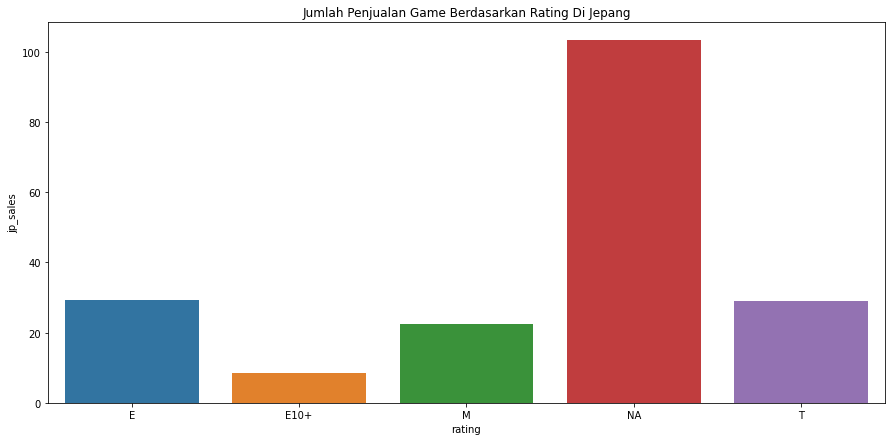

In [48]:
# Viewing the number of sales by rating in Japan
plt.figure(figsize= (15,7))
sns.barplot(data= rating_df, x= 'rating', y= 'jp_sales')
plt.title('Jumlah Penjualan Game Berdasarkan Rating Di Jepang')
plt.show()

**Insights From the Charts Above:**

Based on the analysis of game sales in the three major regions, North America, Europe, and Japan, several significant trends and conclusions can be drawn:

**1. Console Sales:**
* The Xbox 360 is the best-selling console in North America, followed by Europe and Japan.
* In Europe, the PlayStation 4 (PS4) is the most popular console.
* The Nintendo 3DS dominates the console market in Japan.

**2. Game Genres:**
* The Action genre dominates the market share in North America and Europe.
* In Japan, the Role-Playing (RPG) genre is the most popular among players.

**3. Game Ratings:**
* Games with an M (Mature) rating rank highest in sales in North America and Europe.
* Rating information for games in Japan is limited, making it difficult to draw conclusions about rating trends there.

**4. Sales by Region:**
* Sales of games with an M rating in North America exceed 250 million USD.
* Europe also generates over 200 million USD from sales of M-rated games.
* Although rating information is limited, Japan records sales of around 100 million USD, with sales breakdowns based on rating * that are unknown.

**Checklisted Task:**
- [x] Create a plot for each region showing the variation in market share by platform.
- [x] Compare genres in each region.
- [x] Examine whether ESRB ratings affect sales in each region.

### Conclusion <a id='conclusion3'></a>
* Sales trends for consoles, genres, and game ratings vary significantly among the regions of North America, Europe, and Japan.
* Xbox 360 dominates in North America, PS4 leads in Europe, and Nintendo 3DS dominates in Japan.
* The Action genre dominates in North America and Europe, while RPG is favored in Japan.
* Games with an M rating are popular in North America and Europe, while rating data in Japan is limited.
* Difficulty in obtaining rating data in Japan indicates the need for more information for a better understanding of market trends in that region..

## Testing Hypotheses <a id='hypothesis'></a>

**Dalam uji hipotesis ini, kita menguji:**

* Hipotesis nol (H0): Rata-rata rating pengguna platform Xbox One dan PC adalah sama.

* Hipotesis alternatif (H1): Rata-rata rating pengguna platform Xbox One dan PC berbeda.


* Hipotesis nol (H0): Rata-rata rating pengguna genre Action dan Sports adalah sama.

* Hipotesis alternatif (H1): Rata-rata rating pengguna genre Action dan Sports berbeda.


Tingkat signifikansi yang dipilih adalah alpha = 0.05 (5%). Ini umumnya digunakan dalam statistik untuk menguji hipotesis dengan risiko kesalahan tipe I sebesar 5%.

**Key Task:**
- [ ] UJi hipotesis bahwa rata-rata rating pengguna Xbox One dan PC adalah sama.
- [ ] Uji hipotesis jika rata-rata pengguna genre Action dan Sports adalah sama.
- [ ] buat kesimpulannya.

In [49]:
# Importing library
from scipy import stats as st
import numpy as np

In [50]:
# copying to new dataframe
game_df = periode_df.copy()

In [51]:
# mengganti kolom str menjadi int
game_df['rating'] = periode_df['rating'].replace({'E' : 1, 'E10+' : 2, 'M' : 3, 'T' : 4, 'NA': 5})
game_df['genre'] = game_df['genre'].replace({
    'Action' : 1, 
    'Shooter' : 2, 
    'Role-Playing' : 3, 
    'Platform' : 4, 
    'Misc' : 5,
    'Simulation' :6 , 
    'Sports' :7 , 
    'Fighting' : 8, 
    'Racing' :9 , 
    'Strategy' : 10,  
    'Adventure' : 11, 
    'Puzzle' : 12
})

In [52]:
# Testing hypotheses
xone_df = game_df.loc[game_df['platform'] == 'XOne']
pc_df = game_df.loc[game_df['platform'] == 'PC']

In [53]:
# Comparing the variances of the two DataFrames
np.var(xone_df['rating']),np.var(pc_df['rating'])

(1.6831615007621827, 1.6817068634137269)

In [54]:
# Null hypothesis (H0): The average user rating of the Xbox One and PC platforms is the same.
# Alternative hypothesis (H1): The average user rating of the Xbox One and PC platforms is different.
alpha = 0.05

result = st.ttest_ind(xone_df['rating'], pc_df['rating'], equal_var=True)

print('nilai probabilitasnya', result.pvalue)

if result.pvalue < alpha:
    print('Hipotesis nol : Rata-rata rating pengguna platform Xbox One dan PC adalah sama.')
else:
    print('Hipotesis alternatif : Rata-rata rating pengguna platform Xbox One dan PC berbeda')

nilai probabilitasnya 0.007480200720816476
Hipotesis nol : Rata-rata rating pengguna platform Xbox One dan PC adalah sama.


In [55]:
# Testing the hypothesis that the average user rating of the Action and Sports genres is the same.
act_df = game_df.loc[game_df['genre'] ==  1]
sprt_df = game_df.loc[game_df['genre'] == 7]

In [56]:
# Comparing the variances of the two DataFrames
np.var(act_df['rating']),np.var(sprt_df['rating'])

(1.7506481748220093, 2.7099994430830923)

In [57]:
# Null hypothesis (H0): The average user rating of the Action and Sports genres is the same.
# Alternative hypothesis (H1): The average user rating of the Action and Sports genres is different.
alpha = 0.05

result = st.ttest_ind(act_df['rating'], sprt_df['rating'], equal_var=True)

print('nilai probabilitasnya', result.pvalue)

if result.pvalue < alpha:
    print('Hipotesis nol :Rata-rata rating pengguna genre Action dan Sports adalah sama.')
else:
    print('Hipotesis alternatif : Rata-rata rating pengguna genre Action dan Sports berbeda.')

nilai probabilitasnya 2.2150224044138726e-54
Hipotesis nol :Rata-rata rating pengguna genre Action dan Sports adalah sama.


### Conclusion <a id='conclusion4'></a>


* jadi memang benar jika rata-rata rating pengguna platform Xbox One dan PC adalah sama.
* kemudian untuk rata-rata rating pengguna genre Action dan Sports adalah sama juga kita sudah uji dan menghasilkan bahwa hipotesis nol memang benar adanya.

**Checklisted Task:**
- [x] UJi hipotesis bahwa rata-rata rating pengguna Xbox One dan PC adalah sama.
- [x] Uji hipotesis jika rata-rata pengguna genre Action dan Sports adalah sama.
- [x] Membuat kesimpulan

## General Conclusion <a id='final_summary'></a>

 kita dapat mencapai beberapa kesimpulan umum yang dapat membantu dalam merencanakan kampanye iklan untuk tahun 2017:
 
* **Era Perkembangan Game yang Cepat:** 
- Selama tahun 1980-2016, industri game mengalami pertumbuhan yang sangat cepat, terutama pada tahun 2000-an. Hal ini menunjukkan bahwa pasar game memiliki potensi pertumbuhan yang tinggi, yang harus dimanfaatkan dalam merencanakan kampanye iklan.


* **Pengaruh Platform Terlaris:** 
- PS2 menjadi platform terlaris pada tahun 2000-2005, dan PS4 memiliki rata-rata pendapatan per tahun sekitar 80 juta USD. Oleh karena itu, fokus pada konsol-konsol populer seperti PS4 dapat menjadi strategi yang baik untuk merencanakan penjualan game.


* **Pentingnya Ulasan dan Genre:** 
- Data menunjukkan bahwa ulasan dan genre memiliki pengaruh signifikan terhadap penjualan game. Oleh karena itu, perlu mempertimbangkan game dengan ulasan yang baik dan genre yang populer dalam kampanye iklan.


* **Popularitas Platform di Berbagai Wilayah:** 
- Platform seperti Xbox 360, PS4, dan Nintendo 3DS paling sering dimainkan di Amerika, Eropa, dan Jepang. Ini berarti strategi pemasaran harus disesuaikan dengan preferensi Platform masing-masing wilayah.


* **Perbedaan Rating ESRB:** 
- Rating ESRB berbeda-beda di berbagai wilayah. Misalnya, game berating Mature paling laku di Amerika dan Eropa, sementara di Jepang, rating game lebih sering kosong dan rangking ke-2 nya adalah rating Teen. Ini menunjukkan pentingnya memahami preferensi pemain di masing-masing daerah.


* **Konsistensi Rating Pengguna:** 
- Rata-rata rating pengguna platform Xbox One dan PC adalah sama, demikian juga dengan genre Action dan Sports. Ini mungkin mengindikasikan bahwa pemain memiliki preferensi yang seragam dalam kategori-kategori ini.